<a href="https://colab.research.google.com/github/MoniaGierszewska/Kurs-Data-Science/blob/main/10_krok%C3%B3w_do_zrozumienia_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("titanic.csv", sep=",", encoding="utf-8")

In [6]:
# Krok 1. Poznaj rozmiar analizowanego zbioru
df.shape

(891, 12)

In [8]:
# Krok 2. Rzuć okiem na dane
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# Krok 3. Zweryfikuj typy poszczególnych zmiennych
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Krok 4. Zbuduj podstawowe podsumowanie zbioru
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Krok 5. Sprawdź czy w zbiorze występują braki danych
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
print(nulls_summary) 

             Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
PassengerId  False                   0              0.00
Survived     False                   0              0.00
Pclass       False                   0              0.00
Name         False                   0              0.00
Sex          False                   0              0.00
Age           True                 177             19.87
SibSp        False                   0              0.00
Parch        False                   0              0.00
Ticket       False                   0              0.00
Fare         False                   0              0.00
Cabin         True                 687             77.10
Embarked      True                   2              0.22


In [13]:
# Krok 6. Zbadaj skośność rozkładów
df.skew()

<ipython-input-13-a41622f52381>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,6.428074e+02,4070.917079,1437.109,NaN,7.228740e+02,5.430353e+02,9.045873e+02
1,2.607083e-140,0.000000,0.000,NaN,1.071262e-157,1.206110e-118,3.727091e-197


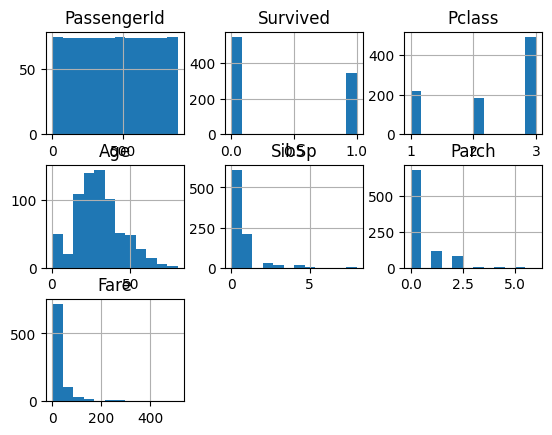

In [14]:
# Krok 7. Sprawdź rozkład zmiennych numerycznych
df.hist(bins=12) # histogram dla wszystkich zmiennych
from scipy import stats # test na normalność rozkładu
df.select_dtypes([float, int]).apply(stats.normaltest) # p-value to wartość

In [17]:
# Krok 8. Zidentyfikuj obserwacje odstające
q1 = df.quantile(0.25)
q3 = df.quantile(0.75) 
iqr = q3-q1 

low_boundary = (q1 - 1.5 * iqr) 
upp_boundary = (q3 + 1.5 * iqr)
num_of_out_L = (df[iqr.index] < low_boundary).sum()
num_of_out_U = (df[iqr.index] > upp_boundary).sum() 

outliers = pd.DataFrame({'low_boundary':low_boundary, 'upp_boundary':upp_boundary,
'num_of_outliers_L':num_of_out_L, 'num_of_outliers_U':num_of_out_U})
print(outliers) 

             low_boundary  upp_boundary  num_of_outliers_L  num_of_outliers_U
PassengerId     -444.0000     1336.0000                  0                  0
Survived          -1.5000        2.5000                  0                  0
Pclass             0.5000        4.5000                  0                  0
Age               -6.6875       64.8125                  0                 11
SibSp             -1.5000        2.5000                  0                 46
Parch              0.0000        0.0000                  0                213
Fare             -26.7240       65.6344                  0                116


<ipython-input-17-b8eb33a59cc3>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
<ipython-input-17-b8eb33a59cc3>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


In [18]:
# Krok 9. Sprawdź liczności zmiennych kategorycznych
for col in df.select_dtypes(['object', 'category']):
  print(df[col].value_counts()) 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 14

In [ ]:
# Krok 10. Zbadaj zależności pomiędzy zmiennymi

In [19]:
# Przypadek A - nie występują wartosci odstające, rozkład normalny. 
np.corrcoef(df.select_dtypes(['float', 'int']), rowvar=0)

array([[ 1.        , -0.00500666, -0.03514399,         nan, -0.05752683,
        -0.00165201,  0.01265822],
       [-0.00500666,  1.        , -0.33848104,         nan, -0.0353225 ,
         0.08162941,  0.25730652],
       [-0.03514399, -0.33848104,  1.        ,         nan,  0.08308136,
         0.01844267, -0.54949962],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [-0.05752683, -0.0353225 ,  0.08308136,         nan,  1.        ,
         0.4148377 ,  0.15965104],
       [-0.00165201,  0.08162941,  0.01844267,         nan,  0.4148377 ,
         1.        ,  0.21622494],
       [ 0.01265822,  0.25730652, -0.54949962,         nan,  0.15965104,
         0.21622494,  1.        ]])

In [20]:
# Przypadek B - mogą występować obserwacje odstające, dowolny rozklad. 
stats.spearmanr(df.select_dtypes(['float', 'int']))[0]

array([[ 1.        , -0.00500666, -0.03409135,         nan, -0.06116077,
         0.00123518, -0.01397513],
       [-0.00500666,  1.        , -0.33966794,         nan,  0.08887948,
         0.13826563,  0.32373614],
       [-0.03409135, -0.33966794,  1.        ,         nan, -0.04301877,
        -0.02280134, -0.68803167],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [-0.06116077,  0.08887948, -0.04301877,         nan,  1.        ,
         0.45001397,  0.44711299],
       [ 0.00123518,  0.13826563, -0.02280134,         nan,  0.45001397,
         1.        ,  0.41007381],
       [-0.01397513,  0.32373614, -0.68803167,         nan,  0.44711299,
         0.41007381,  1.        ]])